In [438]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [439]:
#Import necessary packages
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

# Data Cleaning

In [440]:
gender_submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
print(gender_submission.head())
print('The shape of this table is', gender_submission.shape)

   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1
The shape of this table is (418, 2)


In [441]:
test = pd.read_csv('/kaggle/input/titanic/test.csv')
print('The shape of this table is', test.shape)
#We do not want to examine the test set, as we want to ensure that the model that we build to predict whether a particular person on the titanic will
#survive or not, which is able to generalize well to unseen data in the test set.

The shape of this table is (418, 11)


In [442]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
train.head()
print('The shape of this table is', train.shape)

The shape of this table is (891, 12)


Let's examine which columns in this dataset have null values, as well as what categories these null values may corresspond to.

In [443]:
#Let's first drop duplicate rows

train.drop_duplicates(keep=False, inplace=True)

In [444]:
train.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

There appears to be lots of null values in the Cabin column (327), and the Age column (86). Let's examine both.

In [445]:
train[train['Cabin'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


Since there are so many null values, it may be appropriate to drop the Cabin column from both the train and test set.

In [446]:
train = train.drop(columns = ['Cabin'])
test = test.drop(columns = ['Cabin'])

There is only one null value in the fare column, so it is appropriate to simply impute that value with the average of the fare values.

In [447]:
train.loc[train['Fare'].isnull(), 'Fare'] = np.mean(train['Fare'])
test.loc[test['Fare'].isnull(), 'Fare'] = np.mean(test['Fare'])

The age column also has null values; let's explore those further. Let's impute those values with the average age of the Age column.

In [448]:
train.loc[train['Age'].isnull(), :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,S


In [449]:
train.loc[train['Age'].isnull(), 'Age'] = np.mean(train['Age'])
test.loc[test['Age'].isnull(), 'Age'] = np.mean(test['Age']) #If there happens to be any null values in the test table.

In [450]:
train.isnull().sum().sort_values(ascending = False)

Embarked       2
Fare           0
Ticket         0
Parch          0
SibSp          0
Age            0
Sex            0
Name           0
Pclass         0
Survived       0
PassengerId    0
dtype: int64

In [337]:
#Name is clearly an unnecessary column. Thus let's remove that column from both the tables
train_with_labels = train_with_labels.drop(columns = ['Name'])
test = test.drop(columns = ['Name'])

In [338]:
#Ticket Number is clearly an unnecessary column. Thus let's remove that column from both the tables
train_with_labels = train_with_labels.drop(columns = ['Ticket'])
test = test.drop(columns = ['Ticket'])

# Exploratory Data Analysis

From domain knowledge, women, the young, and the elderly were rescued from the sinking ship in life boats before the men were. This creates the assumption that there may be a greater proportion of survivors that are females versus those that are male. Additionally, another assumption is that the closer the age regresses towards the average, the lower the survival rate. The survival rate is defined as the proportion of passengers that survived as a whole. It is expected to differ based on different groups within the ship.

Finally, another assumption is that those in first class are more likely to survive, and prioritized over those in second and third classes since they paid a higher fare.

**The features:**

**PassengerId:** The primary key within this table. No two records within the table have the same passenger id.

**Pclass:** Qualitative ordinal variable. Each passenger is either in class 1, class 2, and class 3. The reason why this is 
ordinal is because first class is the most expensive and luxurious, and is associated with higher fares, while second class, 
and third class are somewhat less luxurious and expensive respectively.

**Sex:** Qualitative nominal variable. The sex of the particular passenger as either male or female.

**SibSp:** Qualitative nominal variable. This defines the family relations between passengers as to whether they are a sibling or someone's spouse. 
If yes, then they are encoded with 1, else 0.

**Parch** Qualitative nominal variable. This defines family relations with respect to parent and child. If a particular passenger is someone's parent,
or someone's child, then they are encoded with 1, else they are encoded with 0.

**Fare** Quantitative continuous variable. The fare each person paid for the trip. 

**Embarked** Qualitative nominal variable. It is defined as the port of embarkation. Possible values include C, Q, or S. 


In [341]:
grouped_fare = train_with_labels[['Survived', 'Fare']].groupby('Survived', as_index = False).agg(np.mean)
grouped_fare 

,Survived,Fare
0,0,27.558326
1,1,49.747699


**Figure 1**. Clearly, there appears to be a statistically significant difference between those who survived(1) and those who did not(0) in terms of the fare that they paid. Those who paid a larger fare appear to be prioritized more than those who did not, in terms of getting onto the life boats. Thus, Fare is clearly a good feature for predicting who is going to survive or not.

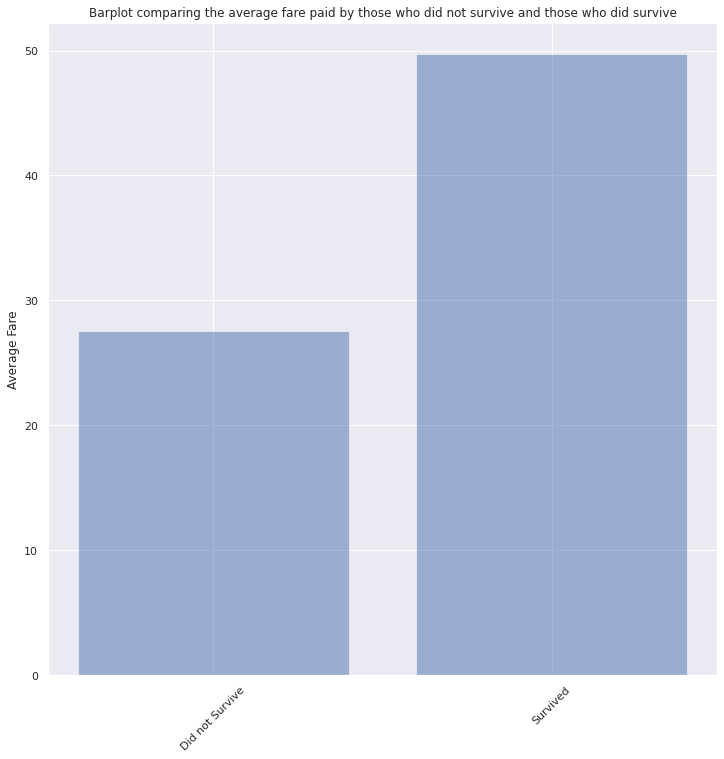

In [342]:
objects = ('Did not Survive', 'Survived')
y_pos = np.arange(len(objects))
performance = [grouped_fare['Fare'].iloc[0], grouped_fare['Fare'].iloc[1]]
plt.bar(y_pos, performance, align='center', alpha=0.5) 
plt.xticks(y_pos, objects)
plt.xticks(rotation= 45)
plt.ylabel('Average Fare')
plt.title('Barplot comparing the average fare paid by those who did not survive and those who did survive')
plt.show()

In [343]:
grouped_pclass = train_with_labels[['Pclass', 'Survived']].groupby('Pclass', as_index = False).agg(np.mean)
grouped_pclass

,Pclass,Survived
0,1,0.467290
1,2,0.322581
2,3,0.330275


**Figure 2**. Clearly, there is a distinction between the high percentage of survivors in first class and the proportion of those survived in second class and third class(which is about the same).

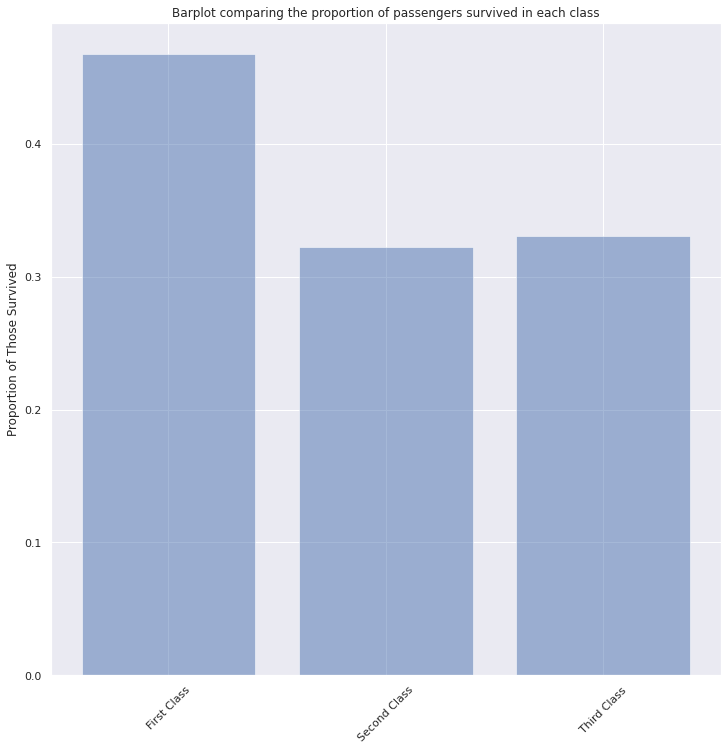

In [344]:
objects = ('First Class', 'Second Class', 'Third Class')
y_pos = np.arange(len(objects))
performance = [grouped_pclass['Survived'].iloc[0], grouped_pclass['Survived'].iloc[1], grouped_pclass['Survived'].iloc[2]]
plt.bar(y_pos, performance, align='center', alpha=0.5) 
plt.xticks(y_pos, objects)
plt.xticks(rotation= 45)
plt.ylabel('Proportion of Those Survived')
plt.title('Barplot comparing the proportion of passengers survived in each class')
plt.show()

In [345]:
grouped_pclass_fare = train_with_labels[['Pclass', 'Fare']].groupby('Pclass', as_index = False).agg(np.mean)
grouped_pclass_fare

,Pclass,Fare
0,1,94.280297
1,2,22.202104
2,3,12.565951


**Figure 3**. As expected, first class paid significantly more in their fare in comparison to second class, and third class respectively.

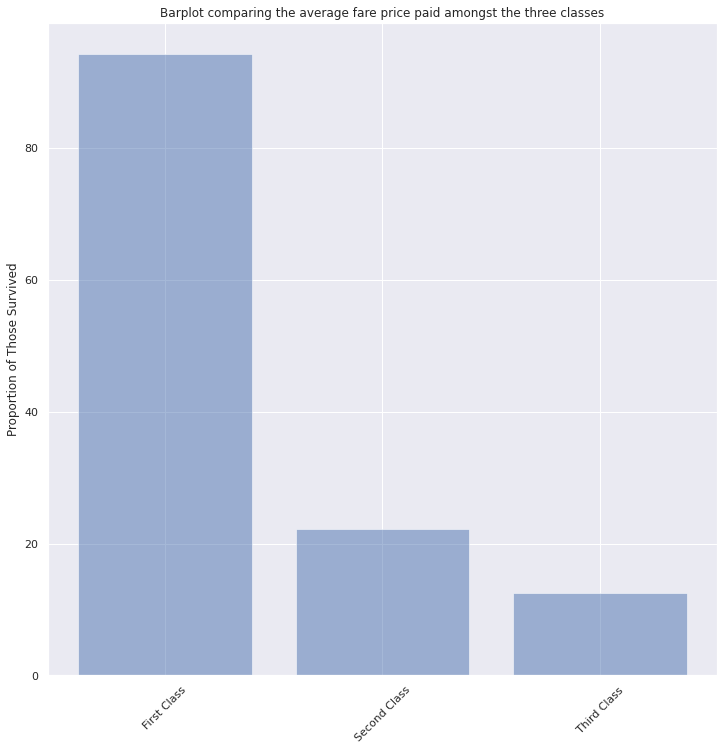

In [346]:
objects = ('First Class', 'Second Class', 'Third Class')
y_pos = np.arange(len(objects))
performance = [grouped_pclass_fare['Fare'].iloc[0], grouped_pclass_fare['Fare'].iloc[1], grouped_pclass_fare['Fare'].iloc[2]]
plt.bar(y_pos, performance, align='center', alpha=0.5) 
plt.xticks(y_pos, objects)
plt.xticks(rotation= 45)
plt.ylabel('Proportion of Those Survived')
plt.title('Barplot comparing the average fare price paid amongst the three classes')
plt.show()

**Figure 4**. The spread of fares appears to be much more larger for first class amongst both males and females. As the class goes from first class to third class, the variability in the fares amongst the passengers decreases. 

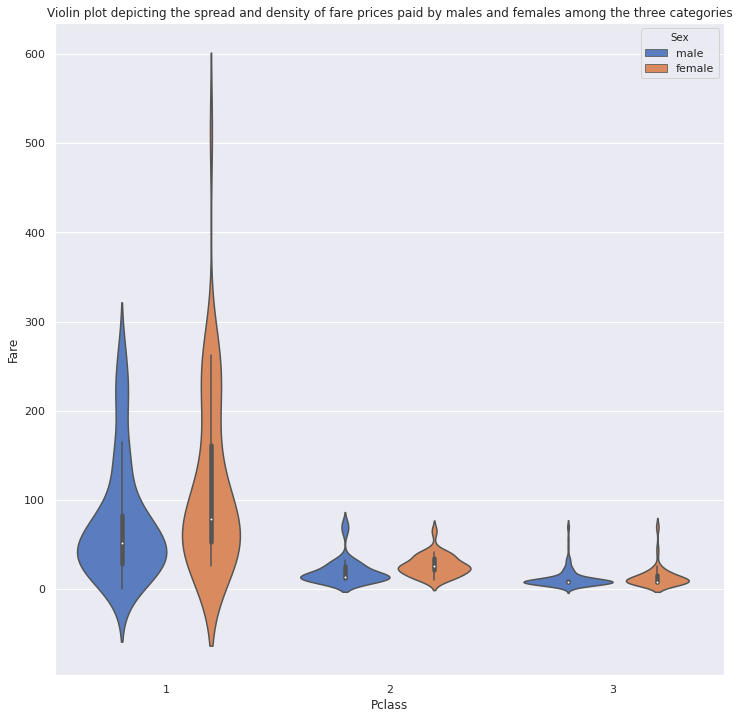

In [347]:
sns.violinplot(x="Pclass", y="Fare", hue="Sex", data=train_with_labels, palette="muted")
sns.set(rc={'figure.figsize':(12,12)})
plt.title('Violin plot depicting the spread and density of fare prices paid by males and females among the three categories')
plt.show()

In [348]:
grouped_embarked = train_with_labels[['Embarked', 'Fare']].groupby('Embarked', as_index = False).agg(np.mean).sort_values('Fare', ascending = False)
grouped_embarked

,Embarked,Fare
0,C,66.259765
2,S,28.257832
1,Q,10.957700


**Figure 5**. It appears to be that those embarking from Cherbourg paid a higher fee for the fare on average****, followed by Southampton, and Queenstown.

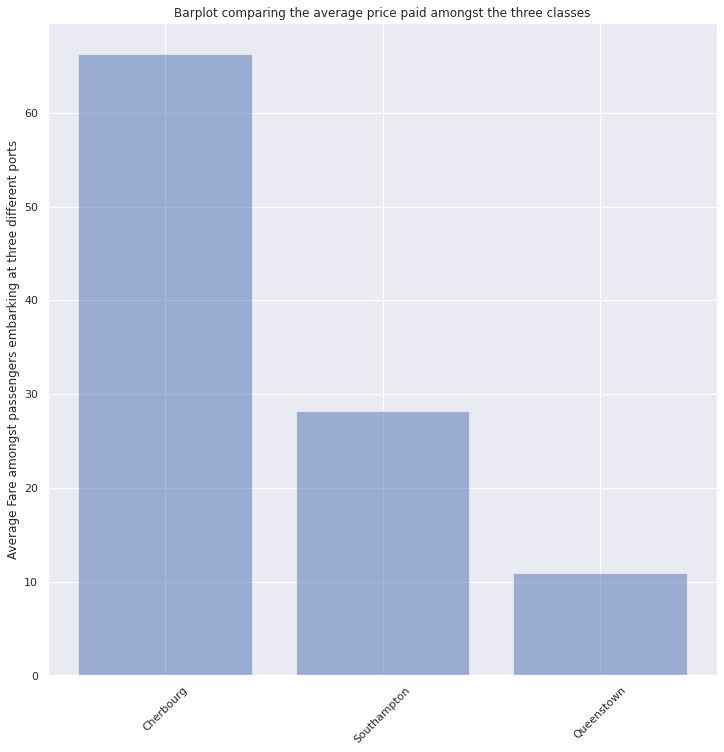

In [349]:
objects = ('Cherbourg', 'Southampton', 'Queenstown')
y_pos = np.arange(len(objects))
performance = [grouped_embarked['Fare'].iloc[0], grouped_embarked['Fare'].iloc[1], grouped_embarked['Fare'].iloc[2]]
plt.bar(y_pos, performance, align='center', alpha=0.5) 
plt.xticks(y_pos, objects)
plt.xticks(rotation= 45)
plt.ylabel('Average Fare amongst passengers embarking at three different ports')
plt.title('Barplot comparing the average price paid amongst the three classes')
plt.show()

In [350]:
grouped_sibsp = train_with_labels[['SibSp', 'Survived']].groupby('SibSp', as_index = False).agg(np.sum).sort_values('SibSp', ascending = False)
grouped_sibsp

,SibSp,Survived
6,8,1
5,5,1
4,4,1
3,3,1
2,2,6
1,1,54
0,0,88


In [351]:
grouped_parch = train_with_labels[['Parch', 'Survived']].groupby('Parch', as_index = False).agg(np.mean).sort_values('Parch', ascending = False)
grouped_parch

,Parch,Survived
7,9,0.500000
6,6,0.000000
5,5,0.000000
4,4,1.000000
3,3,0.666667
2,2,0.606061
1,1,0.538462
0,0,0.305556


In general, it appears that as the number of family members increases from 0 to 4, the survival rate increases (except for potential outliers like 5,6,9. This is most likely because those with large Parch values usually have multiple children on board, and children were prioritized to depart from the ship in lifeboats.

Let's perform one hot encoding on the categorical variables.

In [352]:
train_with_labels.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,892,3,male,34.5,0,0,7.8292,Q,0
1,893,3,female,47.0,1,0,7.0000,S,1
2,894,2,male,62.0,0,0,9.6875,Q,0
3,895,3,male,27.0,0,0,8.6625,S,0
4,896,3,female,22.0,1,1,12.2875,S,1


In [353]:
# #Let's first convert the Pclass column to categorical variables.
def convert_pclass(row):
    if row == 1:
        return 'First Class'
    elif row == 2:
        return 'Second Class'
    elif row == 3:
        return 'Third Class'
        
def feature_pipeline_train(table):
    y = table['Survived']
    table['Pclass'] = table['Pclass'].apply(convert_pclass)
    table = pd.get_dummies(table)
    X = table.drop(columns = ['PassengerId', 'Survived'])
    return X, y

def feature_pipeline_test(table):
    table['Pclass'] = table['Pclass'].apply(convert_pclass)
    table = pd.get_dummies(table)
    X = table.drop(columns = ['PassengerId'])
    return X

X_train, y_train = feature_pipeline_train(train_with_labels)
X_test = feature_pipeline_test(test)
X_train.head()

,Age,SibSp,Parch,Fare,Pclass_First Class,Pclass_Second Class,Pclass_Third Class,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,34.5,0,0,7.8292,0,0,1,0,1,0,1,0
1,47.0,1,0,7.0000,0,0,1,1,0,0,0,1
2,62.0,0,0,9.6875,0,1,0,0,1,0,1,0
3,27.0,0,0,8.6625,0,0,1,0,1,0,0,1
4,22.0,1,1,12.2875,0,0,1,1,0,0,0,1


# Model Development

1. Let's build a KNN(K nearest neighbors algorithm)

In [354]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
neigh.score(X_train, y_train)

0.8851674641148325

In [367]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
training_scores = cross_val_score(neigh, X_train, y_train, cv=5)
print(training_scores)

average_cv_training1 = np.mean(training_scores)
print(average_cv_training1)

[0.70238095 0.70238095 0.70238095 0.74698795 0.69879518]
0.7105851979345955


2. Logistic Regression Classifier

In [375]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0, penalty = 'none').fit(X_train, y_train)
print(lr.score(X_train, y_train))

1.0


In [377]:
training_scores = cross_val_score(lr, X_train, y_train, cv=5)
print(training_scores)

average_cv_training2 = np.mean(training_scores)
print(average_cv_training2)

[1.         1.         1.         1.         0.98795181]
0.9975903614457831


3. Decision Tree Classifier

In [378]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)
print(dt.score(X_train, y_train))

1.0


In [379]:
training_scores = cross_val_score(dt, X_train, y_train, cv=5)
print(training_scores)

average_cv_training3 = np.mean(training_scores)
print(average_cv_training3)

[1. 1. 1. 1. 1.]
1.0


4. Random Forest Ensemble Classifier

In [380]:
from sklearn.ensemble import RandomForestClassifier as RFC #Combining multiple weak learners(multiple decision trees) to make a strong learner(wisdom of the crowd)
rfc_b = RFC()
rfc_b.fit(X_train, y_train)
y_pred = rfc_b.score(X_train, y_train)
y_pred

1.0

In [381]:
training_scores = cross_val_score(rfc_b, X_train, y_train, cv=5)
print(training_scores)

average_cv_training4 = np.mean(training_scores)
print(average_cv_training4)

[1. 1. 1. 1. 1.]
1.0


5. SVM(Support Vector Machine) Classifier

In [391]:
from sklearn import svm
clf = svm.SVC(kernel = 'poly', C=1000)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))

0.9569377990430622


In [395]:
training_scores = cross_val_score(clf, X_train, y_train, cv=5)
print(training_scores)

average_cv_training5 = np.mean(training_scores)
print(average_cv_training5)

[0.96428571 0.89285714 0.94047619 0.92771084 0.96385542]
0.9378370625358577


Since the support vector machine model performed the best, we will use that model for the final predictions for the survival rate.

In [415]:
test['Survived'] = svm_predictions
final_table = test[['PassengerId', 'Survived']]
final_table.to_csv('/kaggle/working/final_table.csv', index=False)

In [437]:
# X_test.drop(columns = ['Survived'])
# random_forest_predictions = rfc_b.predict(X_test)
# test['Survived'] = random_forest_predictions
# final_table_2 = test[['PassengerId', 'Survived']]
# final_table_2.to_csv('/kaggle/working/final_table_2.csv', index = False)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
